In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import RFE, SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Loading dataset
data = pd.read_csv('/content/drive/MyDrive/heart.csv')
# basic info
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  1

In [ ]:
# Checking for missing values
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)

# Filling missing values with column mean for numeric columns
numeric_cols = data.select_dtypes(include=np.number).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Encoding categorical columns using get_dummies
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Displaying the updated data
print(data.head())


Missing values per column:
 Age                  0
RestingBP            0
Cholesterol          0
FastingBS            0
MaxHR                0
Oldpeak              0
HeartDisease         0
Sex_M                0
ChestPainType_ATA    0
ChestPainType_NAP    0
ChestPainType_TA     0
RestingECG_Normal    0
RestingECG_ST        0
ExerciseAngina_Y     0
ST_Slope_Flat        0
ST_Slope_Up          0
dtype: int64
   Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0   40        140          289          0    172      0.0             0   
1   49        160          180          0    156      1.0             1   
2   37        130          283          0     98      0.0             0   
3   48        138          214          0    108      1.5             1   
4   54        150          195          0    122      0.0             0   

   Sex_M  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0   True               True              False             False   
1  F

In [ ]:
# Normalize using StandardScaler
scaler_standard = StandardScaler()
data_standard_scaled = pd.DataFrame(scaler_standard.fit_transform(data), columns=data.columns)
print(data_standard_scaled.head())
# Normalize using MinMaxScaler
scaler_minmax = MinMaxScaler()
data_minmax_scaled = pd.DataFrame(scaler_minmax.fit_transform(data), columns=data.columns)
print(data_minmax_scaled.head())

        Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
0 -1.433140   0.410909     0.825070  -0.551341  1.382928 -0.832432   
1 -0.478484   1.491752    -0.171961  -0.551341  0.754157  0.105664   
2 -1.751359  -0.129513     0.770188  -0.551341 -1.525138 -0.832432   
3 -0.584556   0.302825     0.139040  -0.551341 -1.132156  0.574711   
4  0.051881   0.951331    -0.034755  -0.551341 -0.581981 -0.832432   

   HeartDisease     Sex_M  ChestPainType_ATA  ChestPainType_NAP  \
0     -1.113115  0.515952           2.075177          -0.532838   
1      0.898380 -1.938163          -0.481887           1.876744   
2     -1.113115  0.515952           2.075177          -0.532838   
3      0.898380 -1.938163          -0.481887          -0.532838   
4     -1.113115  0.515952          -0.481887           1.876744   

   ChestPainType_TA  RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  \
0         -0.229679           0.814275      -0.490449         -0.823556   
1         -0.229679       

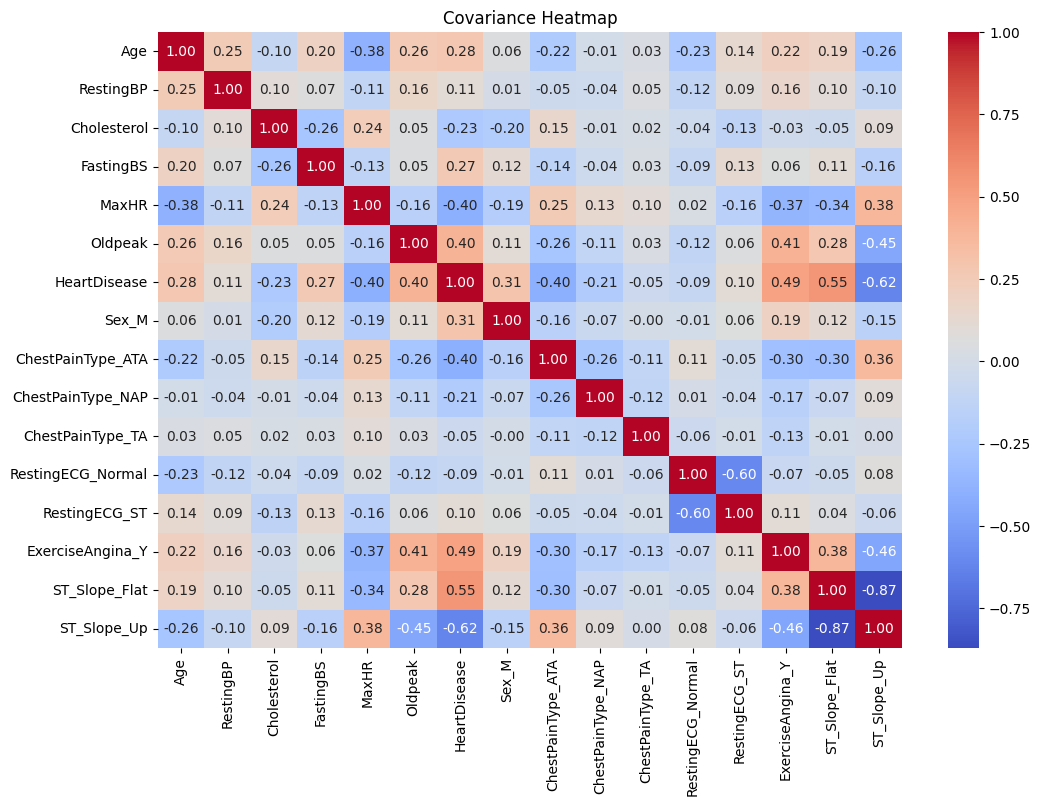

In [ ]:
# Generate heatmap for covariance matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Covariance Heatmap')
plt.show()


In [ ]:
# Split data into features and target
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Filter method - SelectKBest
select_k_best = SelectKBest(score_func=f_classif, k='all')
select_k_best.fit(X_train, y_train)
X_train_k_best = select_k_best.transform(X_train)
X_test_k_best = select_k_best.transform(X_test)

# Wrapper method - Recursive Feature Elimination (RFE)
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=5)
rfe.fit(X_train, y_train)
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Embedded method - RandomForestClassifier feature importance
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
X_train_embedded = X_train.iloc[:, indices[:5]]
X_test_embedded = X_test.iloc[:, indices[:5]]


In [ ]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    return acc, prec, rec, f1, sensitivity, specificity, training_time, cm

# Initialize model
model = RandomForestClassifier()

# Evaluate Filter method
acc_k_best, prec_k_best, rec_k_best, f1_k_best, sens_k_best, spec_k_best, time_k_best, cm_k_best = evaluate_model(model, X_train_k_best, X_test_k_best, y_train, y_test)

# Evaluate Wrapper method
acc_rfe, prec_rfe, rec_rfe, f1_rfe, sens_rfe, spec_rfe, time_rfe, cm_rfe = evaluate_model(model, X_train_rfe, X_test_rfe, y_train, y_test)

# Evaluate Embedded method
acc_embedded, prec_embedded, rec_embedded, f1_embedded, sens_embedded, spec_embedded, time_embedded, cm_embedded = evaluate_model(model, X_train_embedded, X_test_embedded, y_train, y_test)


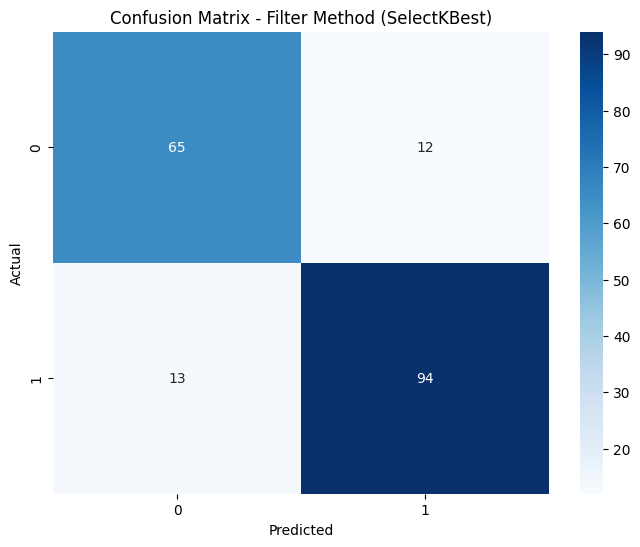

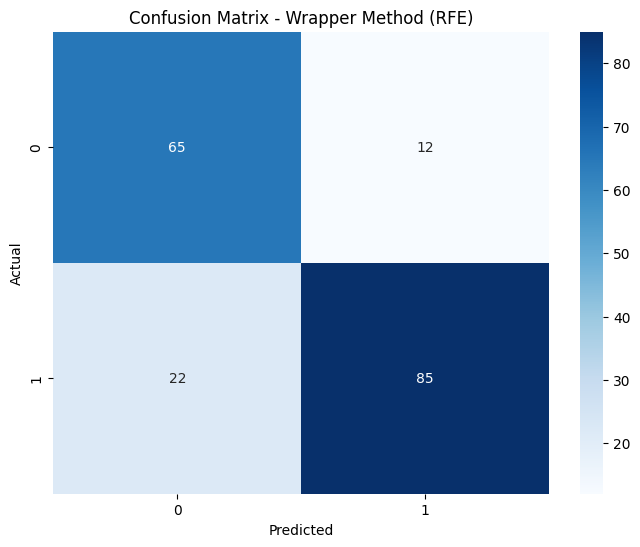

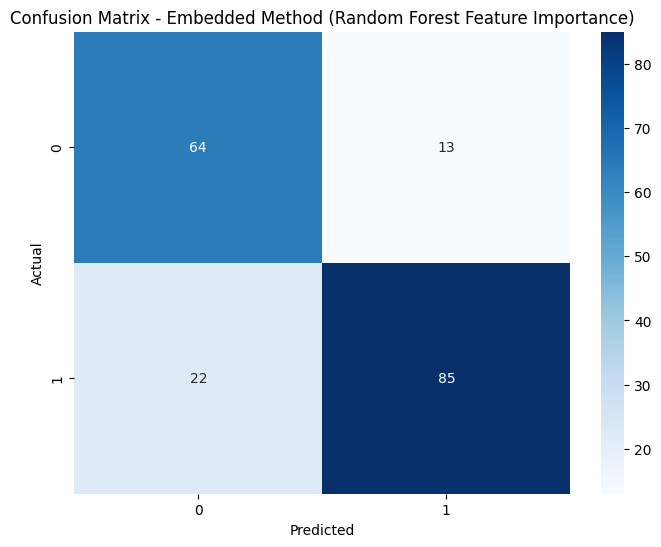

In [ ]:
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(cm_k_best, 'Confusion Matrix - Filter Method (SelectKBest)')
plot_confusion_matrix(cm_rfe, 'Confusion Matrix - Wrapper Method (RFE)')
plot_confusion_matrix(cm_embedded, 'Confusion Matrix - Embedded Method (Random Forest Feature Importance)')


In [ ]:
# Display results
results = pd.DataFrame({
    'Method': ['Filter (SelectKBest)', 'Wrapper (RFE)', 'Embedded (Random Forest)'],
    'Accuracy': [acc_k_best, acc_rfe, acc_embedded],
    'Precision': [prec_k_best, prec_rfe, prec_embedded],
    'Recall': [rec_k_best, rec_rfe, rec_embedded],
    'F1 Score': [f1_k_best, f1_rfe, f1_embedded],
    'Sensitivity': [sens_k_best, sens_rfe, sens_embedded],
    'Specificity': [spec_k_best, spec_rfe, spec_embedded],
    'Training Time (s)': [time_k_best, time_rfe, time_embedded]
})

print(results)


                     Method  Accuracy  Precision    Recall  F1 Score  \
0      Filter (SelectKBest)  0.864130   0.886792  0.878505  0.882629   
1             Wrapper (RFE)  0.815217   0.876289  0.794393  0.833333   
2  Embedded (Random Forest)  0.809783   0.867347  0.794393  0.829268   

   Sensitivity  Specificity  Training Time (s)  
0     0.878505     0.844156           0.212820  
1     0.794393     0.844156           0.255877  
2     0.794393     0.831169           0.237693  
